In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

### Beam parameters

In [2]:
# number of sampling points
N = 2048
# photon energy in eV
E0 = 17795

# parameter dictionary. z_source is in LCLS coordinates (20 meters upstream of undulator exit)
beam_params = {
    'photonEnergy': E0,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'rangeFactor': 5,
    'scaleFactor': 10,
    'z_source': 630
}

### Define beamline

In [3]:
# crystal asymmetry angle
alphaAsym = 27.98*np.pi/180

# distance between crystal 2 and 1st CRL, 2nd CRL and crystal 4 
f1 = 9.8
# distance between CRLs and focus
f2 = 10

# crystal reflection hkl index
hkl = [6,6,0]

# initialize the beam
b1 = beam.Beam(beam_params=beam_params)

# viewing point upstream of monochromator
im0 = optics.PPM('im0', z=870, FOV=2e-3, N=256)
crl0 = optics.CRL('crl0', z=830, roc=435e-6, diameter=2e-3)

# first crystal: symmetric reflection
crystal1 = optics.Crystal('c1', hkl=hkl, length=10e-2, width=20e-3, z=880, E0=E0,
                          alphaAsym=0, orientation=0, pol='s', delta=0.e-6)

# second crystal: asymmetric reflection, orientation flipped relative to crystal1
crystal2 = optics.Crystal('c2', hkl=hkl, length=10e-2, width=20e-3, z=crystal1.z+.2, E0=E0,alphaAsym=alphaAsym, 
                          orientation=2,pol='s', delta=0e-6)
# printing crystal incidence and reflection angles for confirmation
print('crystal 2 incidence angle: {:.2f} degrees'.format(crystal2.alpha*180/np.pi))
print('crystal 2 exit angle: {:.2f} degrees'.format(crystal2.beta0*180/np.pi))

im_upstream = optics.PPM('im_upstream', z=crystal2.z + f1 - .1, FOV=2e-3, N=256)

# CRL with ~1 meter focal length (modeled as single element for now)
crl1 = optics.CRL('crl1', z=crystal2.z+f1, roc=21e-6, diameter=5e-3)

# viewing point downstream of first crl
im1 = optics.PPM('im1', z=crl1.z+.1,N=256,FOV=2e-3)

# viewing point at focus
focus = optics.PPM('focus', z=crl1.z+f2+.03, FOV=100e-6, N=256)

# slit at focus
slit = optics.Slit('slit', z=crl1.z+f2 + 1e-3+.03, x_width=10e-6, y_width=2e-3)

# second CRL with ~1 meter focal length, for collimation
crl2 = optics.CRL('crl2', z=crl1.z+2*f2, roc=21e-6, diameter=5e-3)

# third crystal, symmetric reflection, same orientation as crystal2
crystal3 = optics.Crystal('c3', hkl=hkl, length=10e-2, width=10e-3, z=crl2.z+2, E0=E0,alphaAsym=0, orientation=2,
                         asym_type='emergence',pol='s')

# fourth crystal, asymmetric reflection, same orientation as crystal1
crystal4 = optics.Crystal('c4', hkl=hkl, length=10e-2, width=10e-3, z=crl2.z+2 + (f1-2)*np.cos(crystal1.beta0*2), E0=E0,alphaAsym=-alphaAsym, 
                          asym_type='emergence', orientation=0,pol='s')

# viewing point just downstream of monochromator
im2 = optics.PPM('im2', z=crystal4.z+.1, FOV=2e-3, N=256)

# list of devices to propagate through
devices = [crl0,im0,crystal1,crystal2,im_upstream, im1, crl1, focus, slit, crl2, crystal3, crystal4, im2]
# devices = [im0,crystal1,crystal2,im_upstream, im1, crl1, focus, crl2, crystal3, crystal4, im2]

# initialize beamline
mono_beamline = beamline.Beamline(devices)

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 1.7 μrad
FWHM Divergence (y): 1.7 μrad
10.145623718254422
10.145623718254422
x is focused
y is focused
b 1.00
b 10.01
crystal 2 incidence angle: 60.96 degrees
crystal 2 exit angle: 5.01 degrees
b 1.00
b 0.10
after c1: 1.1511
after c2: -0.0002
after c3: -1.1513
after c4: -0.0002


In [4]:
print('crystal 2 incidence angle: {:.2f} degrees'.format(crystal2.alpha*180/np.pi))
print('crystal 2 exit angle: {:.2f} degrees'.format(crystal2.beta0*180/np.pi))

crystal 2 incidence angle: 60.96 degrees
crystal 2 exit angle: 5.01 degrees


### Propagation through monochromator at central photon energy

FWHM in x: 349.36756845025576 microns
FWHM in y: 349.36756845025576 microns
FWHM Divergence (x): 1.7 μrad
FWHM Divergence (y): 1.7 μrad
10.145623718254422
10.145623718254422
crl0
zRx: 7.06e+05
zRy: 1.45e+02
focal length: 202.91
zx: 13932.993620
zy: 200.000000
azimuth 0.00 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 0.0000e+00
component x: 0.0000e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 706125156349.61 microns
zRy: 145496584.59 microns
remaining distance: 40000000.00 microns
goal for zx: 13972993620.17 microns
current zx: 13932993620.17 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 13972.993620
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 13972.993620
zy: 240.000000
azimuth 0.00 mrad
drift2
global_x 0.00
global_y 0.00
x intersect: 0.0000e+00
component x: 0.0000e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 706125156349.6

<IPython.core.display.Javascript object>


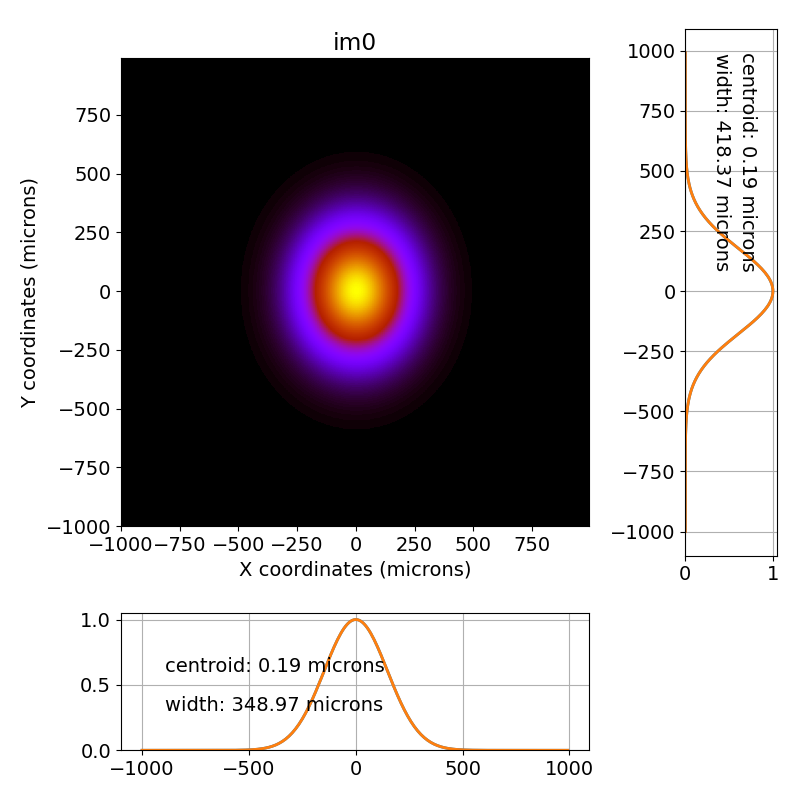

<IPython.core.display.Javascript object>


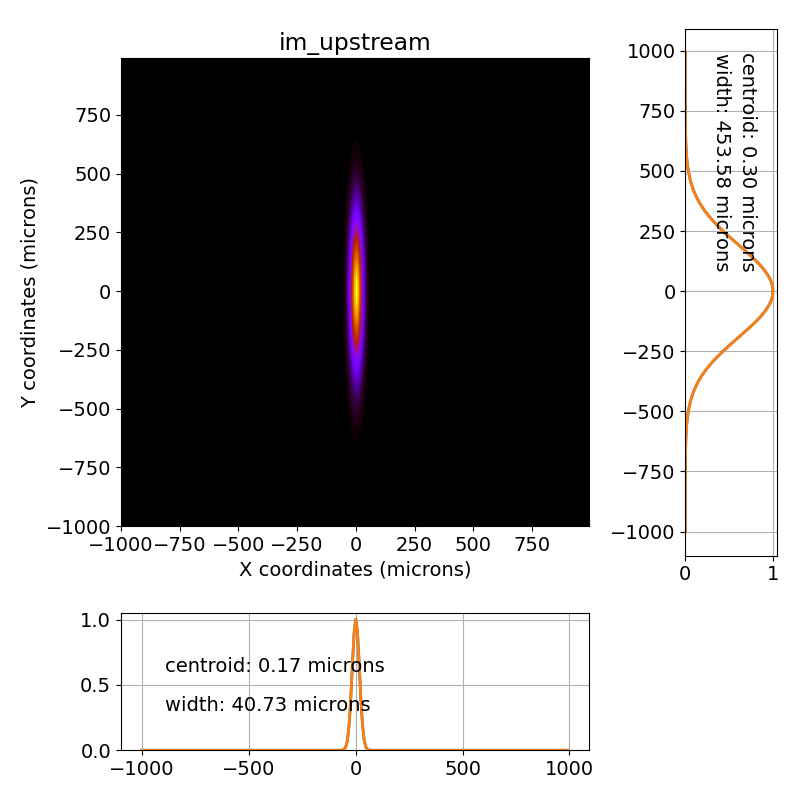

<IPython.core.display.Javascript object>


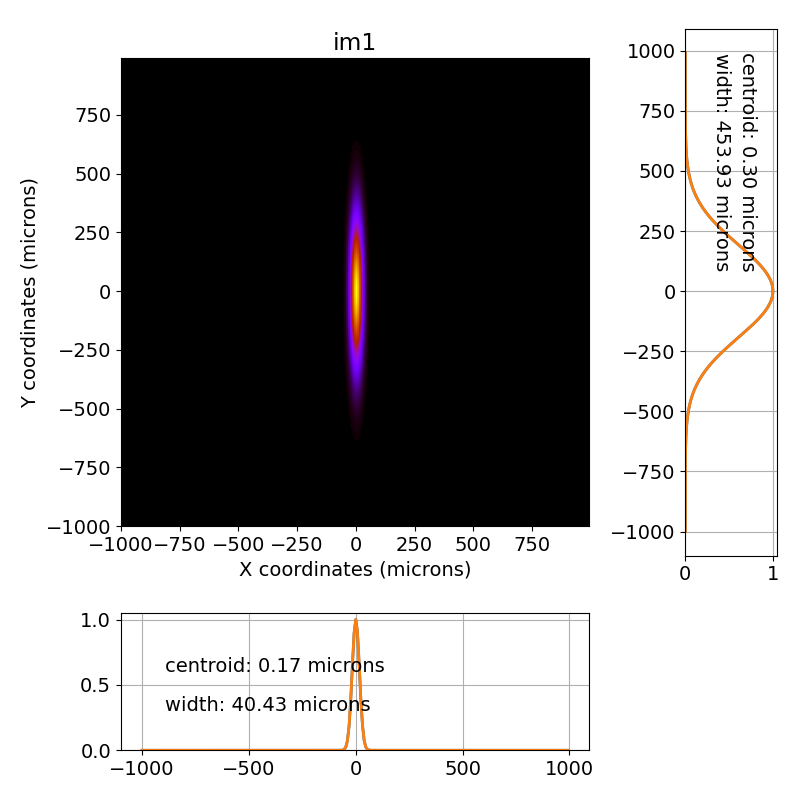

<IPython.core.display.Javascript object>


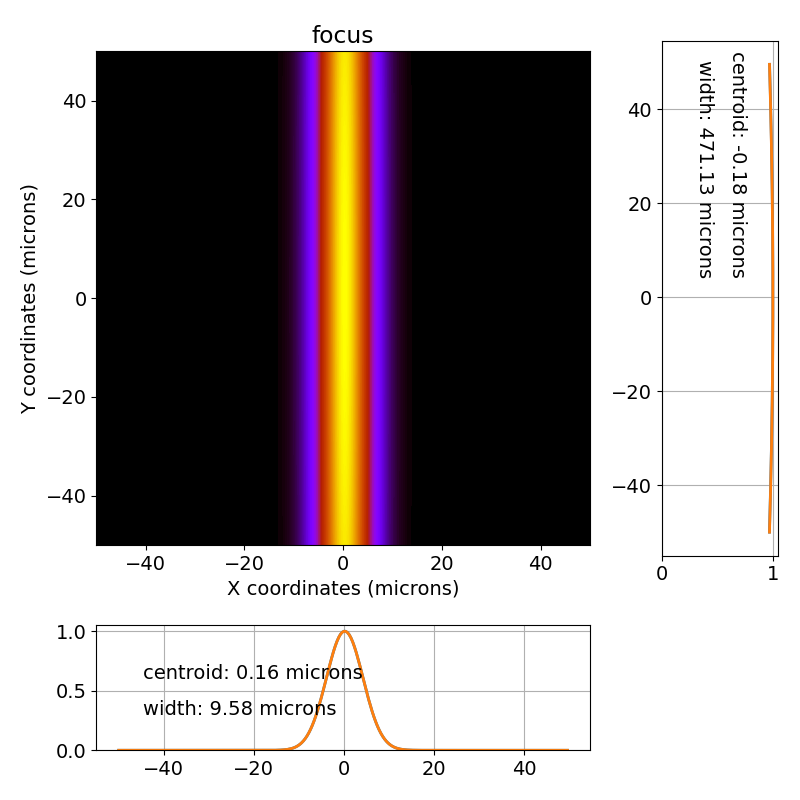

<IPython.core.display.Javascript object>


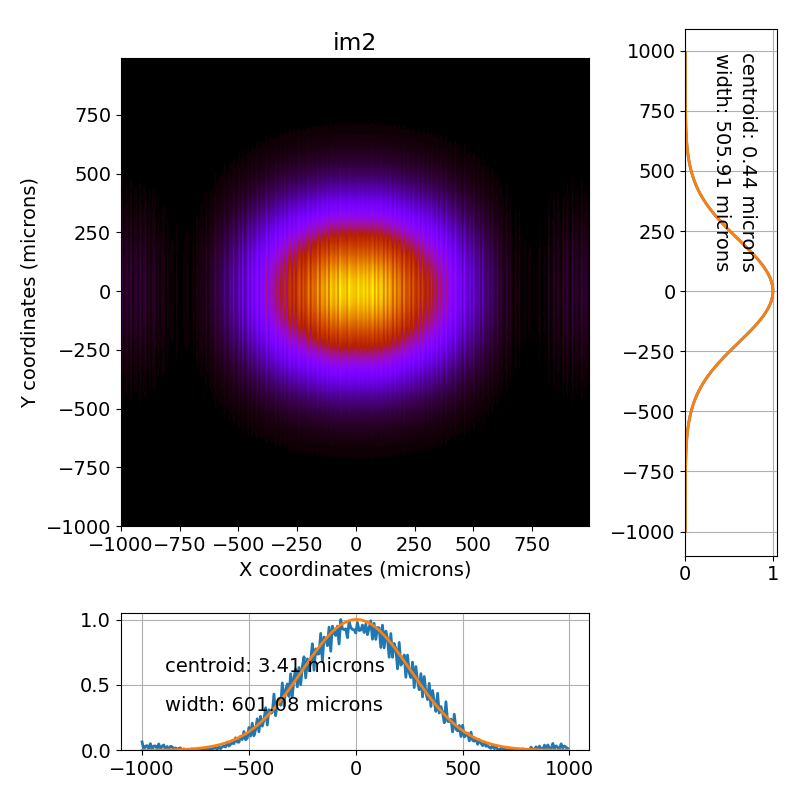

In [5]:
# propagate
b2 = mono_beamline.propagate_beamline(b1)

# view beam at various locations
mono_beamline.im0.view_beam()
mono_beamline.im_upstream.view_beam()
mono_beamline.im1.view_beam()
mono_beamline.focus.view_beam()
mono_beamline.im2.view_beam()

## Time-domain propagation

In [6]:
# reset central photon energy
beam_params['photonEnergy'] = 17795

# initialize pulse. tau sets transform-limited pulse duration in fs (FWHM). Time window is in fs.
pulse = beam.Pulse(beam_params=beam_params, tau=50, time_window=5000)

print('Number of spectral components: {:d}'.format(pulse.N))

Number of spectral components: 224


In [7]:
%%capture capt
# propagate pulse through beamline. This will take a minute or so (depends on number of spectral 
# components which is proportional to the ratio time_window/tau).
pulse.propagate(beamline=mono_beamline, screen_names=['im0','focus','im2'])

### Visualize input

<IPython.core.display.Javascript object>


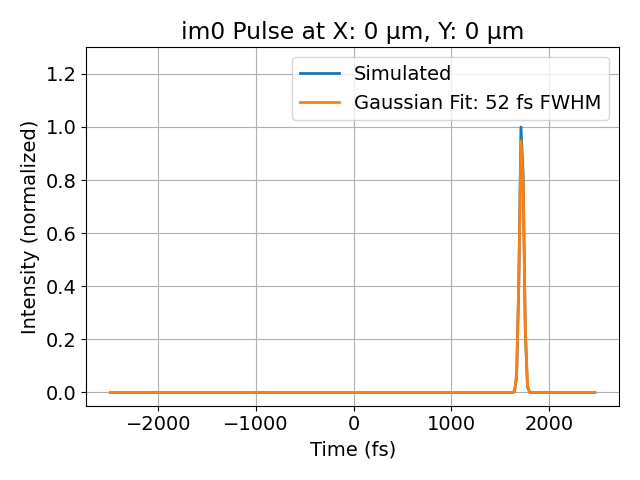

<IPython.core.display.Javascript object>


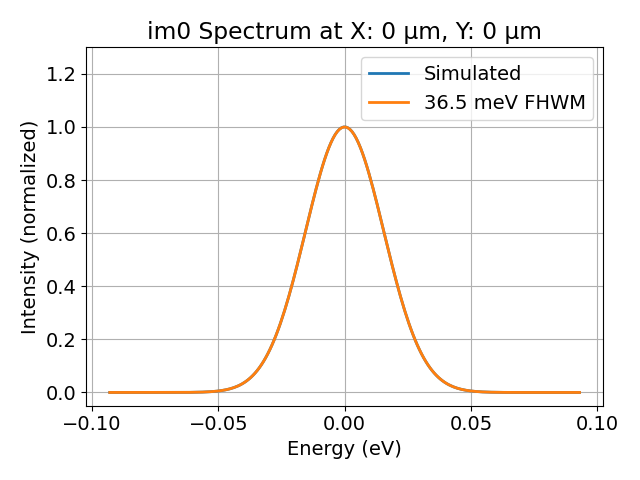

<IPython.core.display.Javascript object>


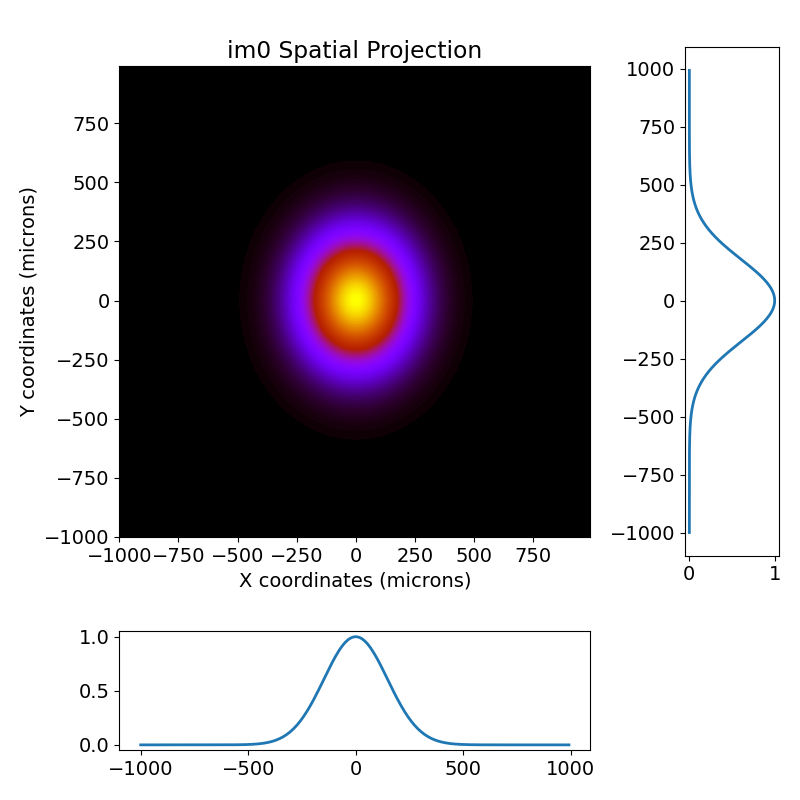

(<matplotlib.axes._subplots.AxesSubplot at 0x1255eedd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x125378550>)

In [8]:
fig_path = '/Users/Matt/OneDrive - SLAC National Accelerator Laboratory/Projects/Tunable Mono/figures/'

# plot input pulse at beam center
pulse.plot_pulse('im0')
# plt.savefig(fig_path+'input_pulse_slit.png')
# plot input spectrum at beam center
pulse.plot_spectrum('im0')
# plt.savefig(fig_path+'input_spectrum_slit.png')
# plot input beam spatial projection
pulse.imshow_projection('im0')
# plt.savefig(fig_path+'input_spatial_slit.png')

### Visualize focus properties

<IPython.core.display.Javascript object>


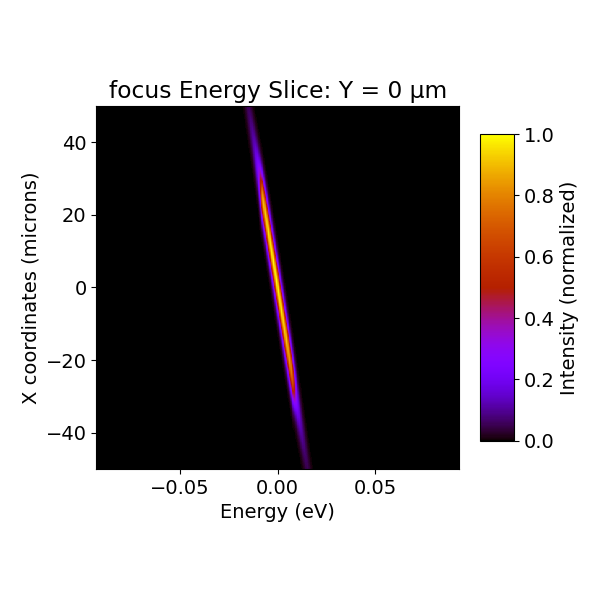

<IPython.core.display.Javascript object>


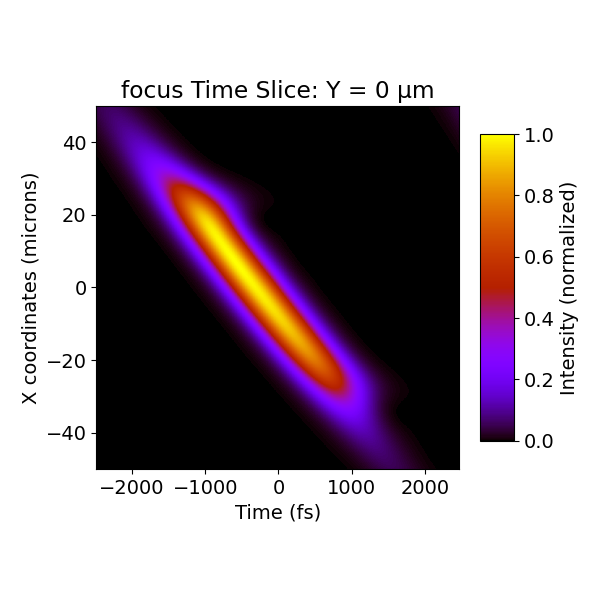

<IPython.core.display.Javascript object>


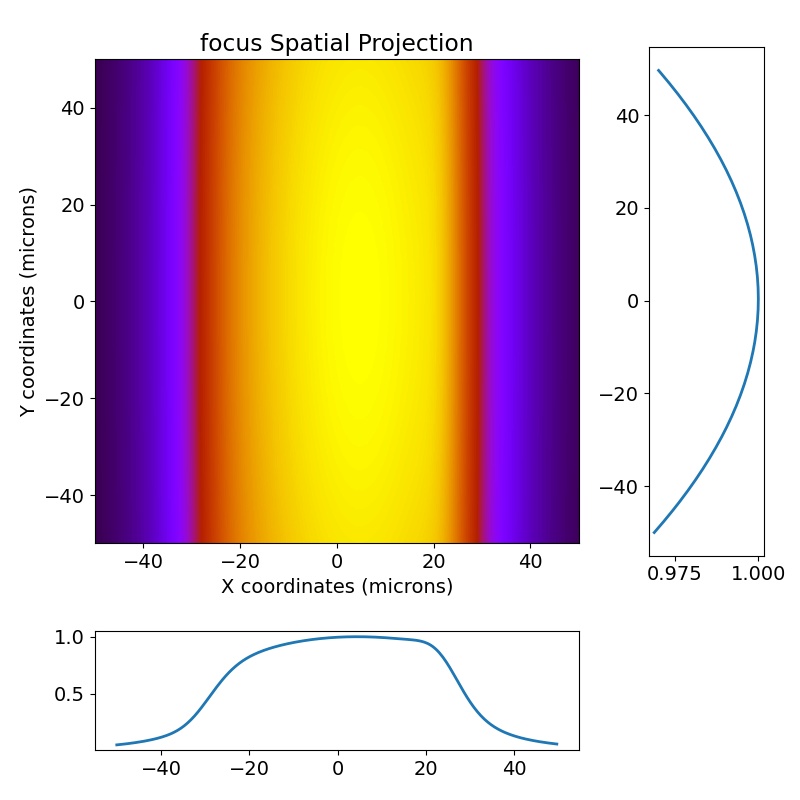

(<matplotlib.axes._subplots.AxesSubplot at 0x125883890>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1258b2cd0>)

In [9]:
# plot energy slice of focus
pulse.imshow_energy_slice('focus')
# plt.savefig(fig_path+'option1_focus_energy.png')
# plot time slice of focus
pulse.imshow_time_slice('focus', shift=-1000)
# plt.savefig(fig_path+'option1_focus_time.png')
# show spatial projection
pulse.imshow_projection('focus')
# plt.savefig(fig_path+'option1_focus_spatial.png')

### Visualize output

<IPython.core.display.Javascript object>


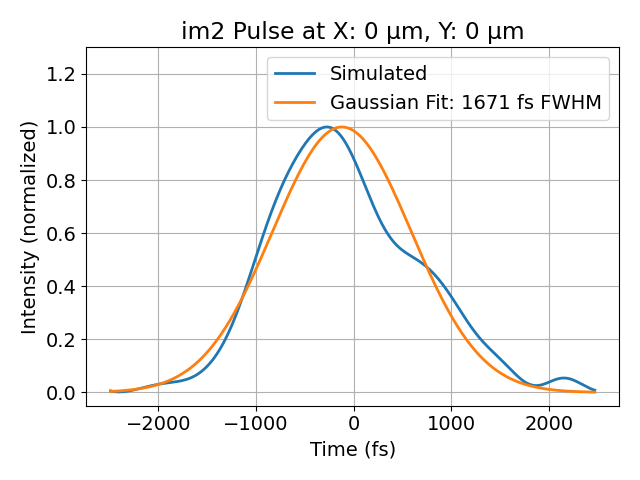

<IPython.core.display.Javascript object>


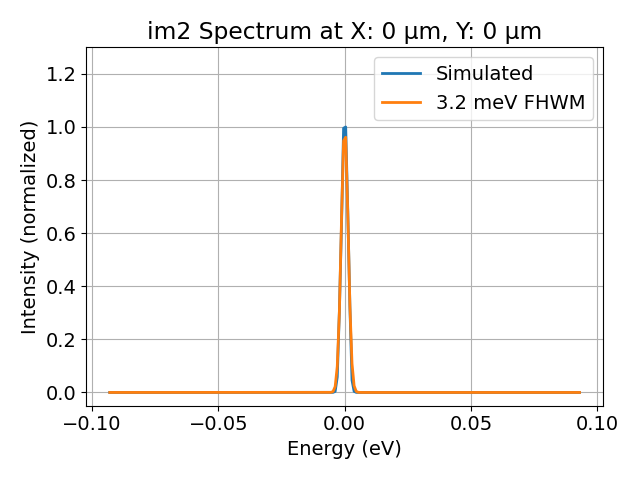

<IPython.core.display.Javascript object>


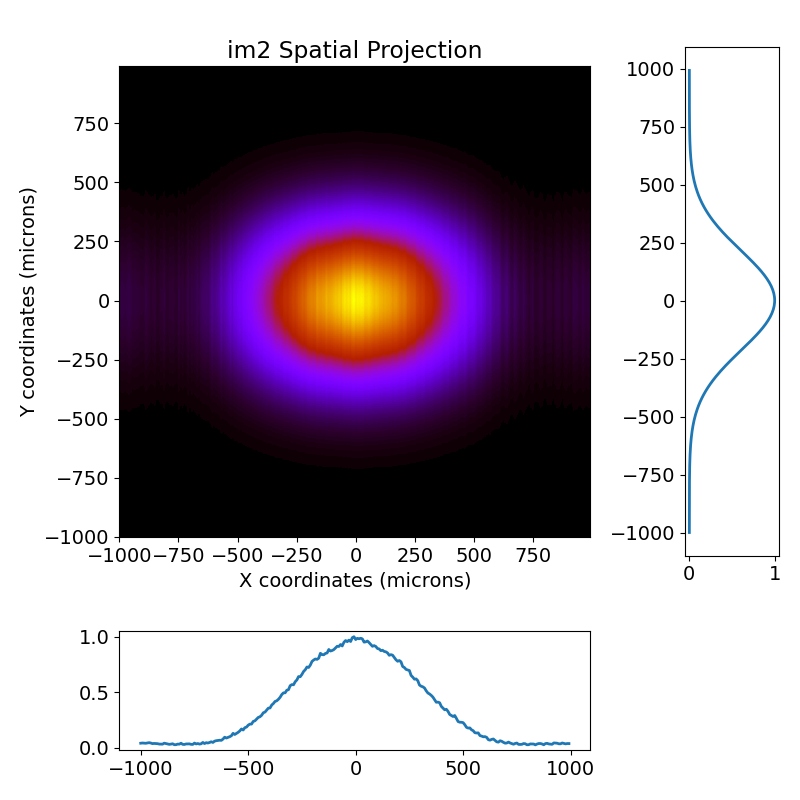

<IPython.core.display.Javascript object>


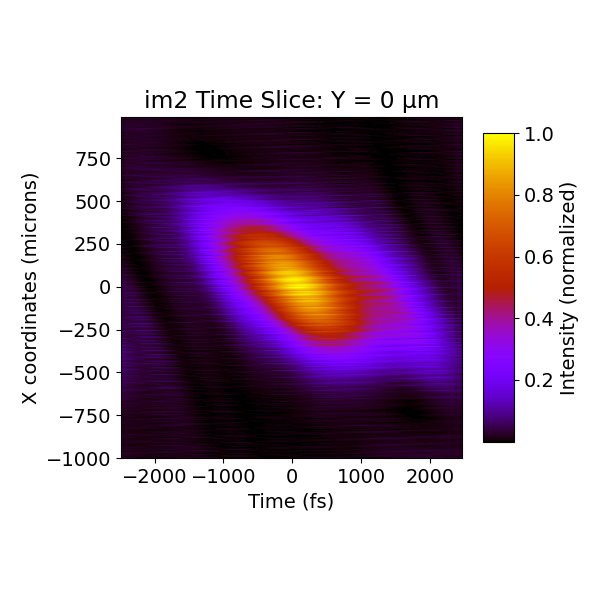

<IPython.core.display.Javascript object>


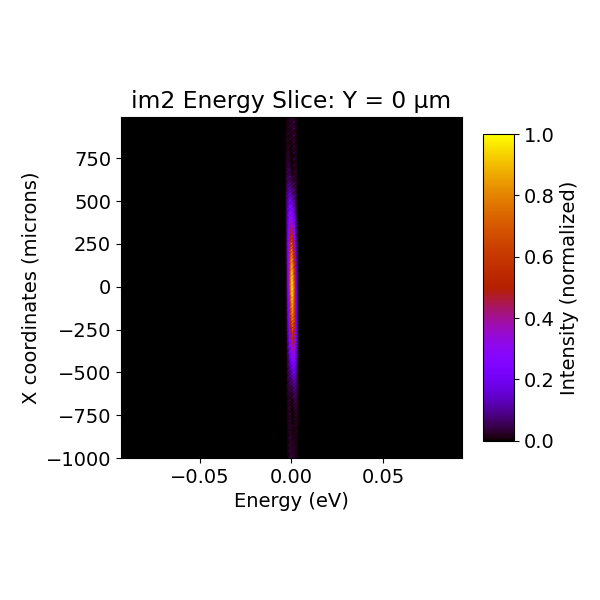

<IPython.core.display.Javascript object>


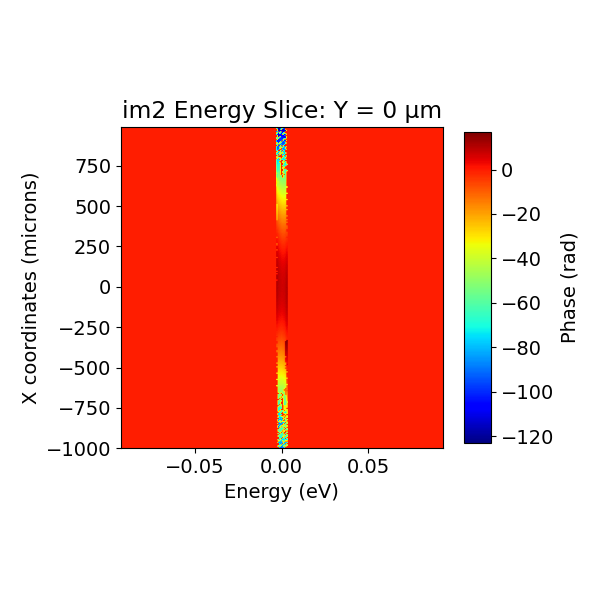

-1.656130979101982
0.0032275473348110967
0.07128296469770432
17795.000031974552
0.07200244661955338


In [10]:
# plot output pulse at beam center
pulse.plot_pulse('im2', shift=0)
# plt.savefig(fig_path+'option1_output_pulse.png')
# plot output spectraum at beam center
pulse.plot_spectrum('im2')
# plt.savefig(fig_path+'option1_output_spectrum.png')
# show spatial projection of output
pulse.imshow_projection('im2')
# plt.savefig(fig_path+'option1_output_spatial.png')
# show time slice of output
pulse.imshow_time_slice('im2', shift=400)
# plt.savefig(fig_path+'option1_output_time.png')
# show energy slice of output
pulse.imshow_energy_slice('im2')
# plt.savefig(fig_path+'option1_output_energy.png')
# show spectral phase slice of output
pulse.imshow_energy_slice('im2', image_type='phase')

print(pulse.pulsefront_tilt('im2'))
print(pulse.pulse_bandwidth('im2'))
print(pulse.throughput('im0','im2'))
print(pulse.central_energy('im2'))

print(pulse.pulse_bandwidth('im2')/pulse.pulse_bandwidth('im0')*.95**4)

# No slit

In [35]:
# list of devices to propagate through
devices = [crl0,im0,crystal1,crystal2,im_upstream, im1, crl1, focus, crl2, crystal3, crystal4, im2]
# devices = [im0,crystal1,crystal2,im_upstream, im1, crl1, focus, crl2, crystal3, crystal4, im2]

# initialize beamline
mono_beamline = beamline.Beamline(devices)


after c1: 1.1511
after c2: -0.0002
after c3: -1.1513
after c4: -0.0002


## Time-domain propagation

In [36]:
# reset central photon energy
beam_params['photonEnergy'] = 17795

# initialize pulse. tau sets transform-limited pulse duration in fs (FWHM). Time window is in fs.
pulse = beam.Pulse(beam_params=beam_params, tau=40, time_window=1000)

print('Number of spectral components: {:d}'.format(pulse.N))

Number of spectral components: 56


In [37]:
# propagate pulse through beamline. This will take a minute or so (depends on number of spectral 
# components which is proportional to the ratio time_window/tau).
pulse.propagate(beamline=mono_beamline, screen_names=['im0','focus','im2'])

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 1.7 μrad
FWHM Divergence (y): 1.7 μrad
10.14555744205071
10.14555744205071
x is focused
y is focused
FWHM in x: 349.36984484800865 microns
FWHM in y: 349.36984484800865 microns
FWHM Divergence (x): 1.7 μrad
FWHM Divergence (y): 1.7 μrad
10.14555744205071
10.14555744205071
crl0
zRx: 7.07e+05
zRy: 1.45e+02
focal length: 202.91
zx: 13945.600589
zy: 200.000000
azimuth 0.00 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 0.0000e+00
component x: 0.0000e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 707398981356.28 microns
zRy: 145495639.01 microns
remaining distance: 40000000.00 microns
goal for zx: 13985600589.35 microns
current zx: 13945600589.35 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 13985.600589
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 13985.600589
zy

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2982: RuntimeWarning: invalid value encountered in true_divide
  line_x = line_x / np.max(line_x)
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2983: RuntimeWarning: invalid value encountered in true_divide
  line_y = line_y / np.max(line_y)
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2990: RuntimeWarning: invalid value encountered in less
  norm_x[norm_x < 0] = 0
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2996: RuntimeWarning: invalid value encountered in less
  norm_y[norm_y < 0] = 0
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:3018: RuntimeWarning: invalid value encountered in greater
  mask = line_x > .1
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:3032

zRx: 3.99e+01
zRy: 1.45e+02
focal length: 9.80
zx: -10.482159
zy: 260.490851
azimuth -0.21 mrad
drift6
global_x 0.45
global_y 0.00
x intersect: 4.4649e-01
component x: 4.4612e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 39864474.35 microns
zRy: 145495673.39 microns
remaining distance: 100000.00 microns
goal for zx: -10382159.28 microns
current zx: -10482159.28 microns
goal for zy: 260590850.60 microns
current zy: 260490850.59 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -10.382159
zy: 260.590851
azimuth -0.21 mrad
im1
zx: -10.382159
zy: 260.590851
azimuth -0.21 mrad
drift7
global_x 0.45
global_y 0.00
x intersect: 4.4438e-01
component x: 4.4402e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 39864474.35 microns
zRy: 145495673.39 microns
remaining distance: 9930000.22 microns
goal for zx: -452159.06 microns
current zx: -10382159.28 microns
goal for zy: 270520850.82 microns
current zy: 260590850.60 

zRx: 4.13e+04
zRy: 1.45e+02
zx: 337.554973
zy: 282.490453
azimuth -1151.31 mrad
drift10
global_x 0.44
global_y 0.00
x intersect: -6.8687e+00
component x: -6.8685e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -25.67
zRx: 41337674498.30 microns
zRy: 145495742.16 microns
remaining distance: 8004425.95 microns
goal for zx: 345559399.44 microns
current zx: 337554973.49 microns
goal for zy: 290494879.13 microns
current zy: 282490453.18 microns
current step size: 8004425.95 microns
x remains focused
y stays unfocused
zx: 345.559399
zy: 290.494879
azimuth -1151.31 mrad
c4
[-3.18558464e-08  0.00000000e+00  5.73660360e-08]
Calculated distance to focus: -34793.244937
zRx: 4.37e+06
zRy: 1.45e+02
zx: 34820.933098
zy: 290.494879
azimuth -0.22 mrad
drift11
global_x -6.87
global_y 0.00
x intersect: -6.8687e+00
component x: -6.8685e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 4.59
zRx: 4365360828245.17 microns
zRy: 145495742.16 microns
remaining distance: 99887.66 microns

FWHM in x: 349.3693481768682 microns
FWHM in y: 349.3693481768682 microns
FWHM Divergence (x): 1.7 μrad
FWHM Divergence (y): 1.7 μrad
10.145571902313337
10.145571902313337
crl0
zRx: 7.07e+05
zRy: 1.45e+02
focal length: 202.91
zx: 13942.848032
zy: 200.000000
azimuth 0.00 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 0.0000e+00
component x: 0.0000e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 707120761376.56 microns
zRy: 145495845.32 microns
remaining distance: 40000000.00 microns
goal for zx: 13982848032.47 microns
current zx: 13942848032.47 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 13982.848032
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 13982.848032
zy: 240.000000
azimuth 0.00 mrad
drift2
global_x 0.00
global_y 0.00
x intersect: 0.0000e+00
component x: 0.0000e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 707120761376.56 m

zRx: 7.08e+05
zRy: 1.45e+02
zx: 13991.930756
zy: 250.000000
azimuth 1151.13 mrad
drift3
global_x 0.00
global_y 0.00
x intersect: 4.4826e-01
component x: 4.4826e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 708039765075.05 microns
zRy: 145495914.09 microns
remaining distance: 490850.44 microns
goal for zx: 13992421606.21 microns
current zx: 13991930755.77 microns
goal for zy: 250490850.44 microns
current zy: 250000000.00 microns
current step size: 490850.44 microns
x remains focused
y stays unfocused
zx: 13992.421606
zy: 250.490850
azimuth 1151.13 mrad
c2
[-2.69922719e-05  0.00000000e+00  2.36573009e-06]
Calculated distance to focus: -139.596819
zRx: 7.06e+03
zRy: 1.45e+02
zx: 139.553656
zy: 250.490850
azimuth -0.18 mrad
drift4
global_x 0.45
global_y 0.00
x intersect: 4.4643e-01
component x: 4.4616e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 7064325095.27 microns
zRy: 145495914.09 microns
remaining distance: 9900000.17 microns
goal for

zx: -10.382312
zy: 260.590851
azimuth -0.21 mrad
drift7
global_x 0.45
global_y 0.00
x intersect: 4.4426e-01
component x: 4.4402e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 39854273.19 microns
zRy: 145495982.86 microns
remaining distance: 9930000.22 microns
goal for zx: -452311.70 microns
current zx: -10382311.92 microns
goal for zy: 270520850.84 microns
current zy: 260590850.62 microns
current step size: 9930000.22 microns
x remains focused
y stays unfocused
zx: -0.452312
zy: 270.520851
azimuth -0.21 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: -0.452312
zy: 270.520851
azimuth -0.21 mrad
drift8
global_x 0.44
global_y 0.00
x intersect: 4.4214e-01
component x: 4.4191e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 39854273.19 microns
zRy: 145495982.86 microns
remaining distance: 9970

zx: -10.382346
zy: 260.590851
azimuth -0.21 mrad
drift7
global_x 0.45
global_y 0.00
x intersect: 4.4423e-01
component x: 4.4402e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 39852007.08 microns
zRy: 145496051.63 microns
remaining distance: 9930000.22 microns
goal for zx: -452345.62 microns
current zx: -10382345.85 microns
goal for zy: 270520850.85 microns
current zy: 260590850.62 microns
current step size: 9930000.22 microns
x remains focused
y stays unfocused
zx: -0.452346
zy: 270.520851
azimuth -0.21 mrad
focus
zx: -0.452346
zy: 270.520851
azimuth -0.21 mrad
drift8
global_x 0.44
global_y 0.00
x intersect: 4.4211e-01
component x: 4.4191e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 39852007.08 microns
zRy: 145496051.63 microns
remaining distance: 9970000.22 microns
goal for zx: 9517654.60 microns
current zx: -452345.62 microns
goal for zy: 280490851.07 microns
current zy: 270520850.85 microns
current step size: 9970000.22 microns
x r

zx: -0.452380
zy: 270.520851
azimuth -0.21 mrad
drift8
global_x 0.44
global_y 0.00
x intersect: 4.4209e-01
component x: 4.4191e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 39849741.27 microns
zRy: 145496120.39 microns
remaining distance: 9970000.22 microns
goal for zx: 9517620.68 microns
current zx: -452379.55 microns
goal for zy: 280490851.08 microns
current zy: 270520850.85 microns
current step size: 9970000.22 microns
x remains focused
y stays unfocused
zx: 9.517621
zy: 280.490851
azimuth -0.21 mrad
crl2
zRx: 4.08e+04
zRy: 1.45e+02
focal length: 9.80
zx: 335.244728
zy: 280.490851
azimuth -0.23 mrad
drift9
global_x 0.44
global_y 0.00
x intersect: 4.4163e-01
component x: 4.4148e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 16.24
zRx: 40759574243.91 microns
zRy: 145496120.39 microns
remaining distance: 1999780.81 microns
goal for zx: 337244508.43 microns
current zx: 335244727.62 microns
goal for zy: 282490631.89 microns
current zy: 280490851.08

zRx: 4.35e+06
zRy: 1.45e+02
zx: 34770.462601
zy: 290.494757
azimuth -0.22 mrad
drift11
global_x -6.87
global_y 0.00
x intersect: -6.8686e+00
component x: -6.8685e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 4.59
zRx: 4352760942487.86 microns
zRy: 145496189.16 microns
remaining distance: 99947.28 microns
goal for zx: 34770562548.34 microns
current zx: 34770462601.06 microns
goal for zy: 290594704.00 microns
current zy: 290494756.72 microns
current step size: 99947.28 microns
x remains focused
y stays unfocused
zx: 34770.562548
zy: 290.594704
azimuth -0.22 mrad
im2
zx: 34770.562548
zy: 290.594704
azimuth -0.22 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 1.7 μrad
FWHM Divergence (y): 1.7 μrad
10.145598412794822
10.145598412794822
x is focused
y is focused
FWHM in x: 349.3684376167924 microns
FWHM in y: 349.3684376167924 microns
FWHM Divergence (x): 1.7 μrad
FWHM Divergence (y): 1.7 μrad
10.145598412794822
10.1455984

zx: 13986.887885
zy: 250.000000
azimuth 0.00 mrad
c1
[0. 0. 0.]
Calculated distance to focus: -13986.887885
zRx: 7.08e+05
zRy: 1.45e+02
zx: 13986.887884
zy: 250.000000
azimuth 1151.13 mrad
drift3
global_x 0.00
global_y 0.00
x intersect: 4.4826e-01
component x: 4.4826e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 707529858283.50 microns
zRy: 145496292.32 microns
remaining distance: 490850.44 microns
goal for zx: 13987378734.67 microns
current zx: 13986887884.23 microns
goal for zy: 250490850.44 microns
current zy: 250000000.00 microns
current step size: 490850.44 microns
x remains focused
y stays unfocused
zx: 13987.378735
zy: 250.490850
azimuth 1151.13 mrad
c2
[-1.17647976e-05  0.00000000e+00  1.03121299e-06]
Calculated distance to focus: -139.546508
zRx: 7.06e+03
zRy: 1.45e+02
zx: 139.527705
zy: 250.490850
azimuth -0.20 mrad
drift4
global_x 0.45
global_y 0.00
x intersect: 4.4628e-01
component x: 4.4616e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta 

zRx: 7.06e+03
zRy: 1.45e+02
zx: 139.522988
zy: 250.490850
azimuth -0.20 mrad
drift4
global_x 0.45
global_y 0.00
x intersect: 4.4625e-01
component x: 4.4616e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 7058314607.09 microns
zRy: 145496361.09 microns
remaining distance: 9900000.20 microns
goal for zx: 149422987.93 microns
current zx: 139522987.73 microns
goal for zy: 260390850.64 microns
current zy: 250490850.44 microns
current step size: 9900000.20 microns
x remains focused
y stays unfocused
zx: 149.422988
zy: 260.390851
azimuth -0.20 mrad
im_upstream
zx: 149.422988
zy: 260.390851
azimuth -0.20 mrad
drift5
global_x 0.45
global_y 0.00
x intersect: 4.4623e-01
component x: 4.4614e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 7058314607.09 microns
zRy: 145496361.09 microns
remaining distance: 100000.00 microns
goal for zx: 149522987.93 microns
current zx: 149422987.93 microns
goal for zy: 260490850.65 microns
current zy: 260390850.64 micron

zx: -0.452532
zy: 270.520851
azimuth -0.21 mrad
drift8
global_x 0.44
global_y 0.00
x intersect: 4.4197e-01
component x: 4.4191e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 39839548.79 microns
zRy: 145496429.86 microns
remaining distance: 9970000.22 microns
goal for zx: 9517468.01 microns
current zx: -452532.21 microns
goal for zy: 280490851.10 microns
current zy: 270520850.88 microns
current step size: 9970000.22 microns
x remains focused
y stays unfocused
zx: 9.517468
zy: 280.490851
azimuth -0.21 mrad
crl2
zRx: 4.07e+04
zRy: 1.45e+02
focal length: 9.80
zx: 335.006047
zy: 280.490851
azimuth -0.22 mrad
drift9
global_x 0.44
global_y 0.00
x intersect: 4.4153e-01
component x: 4.4148e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 16.24
zRx: 40689961045.96 microns
zRy: 145496429.86 microns
remaining distance: 1999926.97 microns
goal for zx: 337005974.13 microns
current zx: 335006047.15 microns
goal for zy: 282490778.07 microns
current zy: 280490851.10

zx: 34735.686400
zy: 290.594661
azimuth -0.22 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 1.7 μrad
FWHM Divergence (y): 1.7 μrad
10.145620103188765
10.145620103188765
x is focused
y is focused
FWHM in x: 349.36769261663807 microns
FWHM in y: 349.36769261663807 microns
FWHM Divergence (x): 1.7 μrad
FWHM Divergence (y): 1.7 μrad
10.145620103188765
10.145620103188765
crl0
zRx: 7.06e+05
zRy: 1.45e+02
focal length: 202.91
zx: 13933.680685
zy: 200.000000
azimuth 0.00 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 0.0000e+00
component x: 0.0000e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 706194548749.57 microns
zRy: 145496533.01 microns
remaining distance: 40000000.00 microns
goal for zx: 13973680685.27 microns
current zx: 13933680685.27 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 13973.680685
z

Calculated distance to focus: -13982.764614
zRx: 7.07e+05
zRy: 1.45e+02
zx: 13982.764613
zy: 250.000000
azimuth 1151.13 mrad
drift3
global_x 0.00
global_y 0.00
x intersect: 4.4826e-01
component x: 4.4826e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 707113072764.16 microns
zRy: 145496601.78 microns
remaining distance: 490850.44 microns
goal for zx: 13983255463.21 microns
current zx: 13982764612.77 microns
goal for zy: 250490850.44 microns
current zy: 250000000.00 microns
current step size: 490850.44 microns
x remains focused
y stays unfocused
zx: 13983.255463
zy: 250.490850
azimuth 1151.13 mrad
c2
[ 6.91995695e-07  0.00000000e+00 -6.06594577e-08]
Calculated distance to focus: -139.505372
zRx: 7.06e+03
zRy: 1.45e+02
zx: 139.506478
zy: 250.490850
azimuth -0.21 mrad
drift4
global_x 0.45
global_y 0.00
x intersect: 4.4615e-01
component x: 4.4616e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 7055080880.86 microns
zRy: 145496601.78 microns
rem

zRx: 7.05e+03
zRy: 1.45e+02
zx: 139.501761
zy: 250.490850
azimuth -0.22 mrad
drift4
global_x 0.45
global_y 0.00
x intersect: 4.4613e-01
component x: 4.4616e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 7054157304.71 microns
zRy: 145496670.55 microns
remaining distance: 9900000.23 microns
goal for zx: 149401761.26 microns
current zx: 139501761.03 microns
goal for zy: 260390850.67 microns
current zy: 250490850.44 microns
current step size: 9900000.23 microns
x remains focused
y stays unfocused
zx: 149.401761
zy: 260.390851
azimuth -0.22 mrad
im_upstream
zx: 149.401761
zy: 260.390851
azimuth -0.22 mrad
drift5
global_x 0.45
global_y 0.00
x intersect: 4.4611e-01
component x: 4.4614e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 7054157304.71 microns
zRy: 145496670.55 microns
remaining distance: 100000.00 microns
goal for zx: 149501761.26 microns
current zx: 149401761.26 microns
goal for zy: 260490850.67 microns
current zy: 260390850.67 micron

zx: 149.397045
zy: 260.390851
azimuth -0.22 mrad
drift5
global_x 0.45
global_y 0.00
x intersect: 4.4608e-01
component x: 4.4614e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 7053233880.08 microns
zRy: 145496739.32 microns
remaining distance: 100000.00 microns
goal for zx: 149497044.75 microns
current zx: 149397044.74 microns
goal for zy: 260490850.68 microns
current zy: 260390850.68 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 149.497045
zy: 260.490851
azimuth -0.22 mrad
crl1
zRx: 3.98e+01
zRy: 1.45e+02
focal length: 9.80
zx: -10.482685
zy: 260.490851
azimuth -0.21 mrad
drift6
global_x 0.45
global_y 0.00
x intersect: 4.4606e-01
component x: 4.4612e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 39829362.31 microns
zRy: 145496739.32 microns
remaining distance: 100000.00 microns
goal for zx: -10382685.12 microns
current zx: -10482685.12 microns
goal for zy: 260590850.68 microns
current zy: 260490850.

zRx: 7.07e+05
zRy: 1.45e+02
zx: 13980.017120
zy: 250.000000
azimuth 1151.13 mrad
drift3
global_x 0.00
global_y 0.00
x intersect: 4.4826e-01
component x: 4.4826e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 706835420908.06 microns
zRy: 145496808.09 microns
remaining distance: 490850.44 microns
goal for zx: 13980507970.78 microns
current zx: 13980017120.34 microns
goal for zy: 250490850.44 microns
current zy: 250000000.00 microns
current step size: 490850.44 microns
x remains focused
y stays unfocused
zx: 13980.507971
zy: 250.490850
azimuth 1151.13 mrad
c2
[ 8.99550026e-06  0.00000000e+00 -7.88571827e-07]
Calculated distance to focus: -139.477962
zRx: 7.05e+03
zRy: 1.45e+02
zx: 139.492328
zy: 250.490850
azimuth -0.22 mrad
drift4
global_x 0.45
global_y 0.00
x intersect: 4.4607e-01
component x: 4.4616e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 7052310612.61 microns
zRy: 145496808.09 microns
remaining distance: 9900000.24 microns
goal for

zx: 13979.101531
zy: 250.000000
azimuth 0.00 mrad
c1
[0. 0. 0.]
Calculated distance to focus: -13979.101531
zRx: 7.07e+05
zRy: 1.45e+02
zx: 13979.101533
zy: 250.000000
azimuth 1151.13 mrad
drift3
global_x 0.00
global_y 0.00
x intersect: 4.4826e-01
component x: 4.4826e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 706742906978.86 microns
zRy: 145496876.86 microns
remaining distance: 490850.44 microns
goal for zx: 13979592383.18 microns
current zx: 13979101532.74 microns
goal for zy: 250490850.44 microns
current zy: 250000000.00 microns
current step size: 490850.44 microns
x remains focused
y stays unfocused
zx: 13979.592383
zy: 250.490850
azimuth 1151.13 mrad
c2
[ 1.17631531e-05  0.00000000e+00 -1.03120882e-06]
Calculated distance to focus: -139.468827
zRx: 7.05e+03
zRy: 1.45e+02
zx: 139.487612
zy: 250.490850
azimuth -0.22 mrad
drift4
global_x 0.45
global_y 0.00
x intersect: 4.4604e-01
component x: 4.4616e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta 

zx: 34689.267302
zy: 290.594603
azimuth -0.22 mrad
im2
zx: 34689.267302
zy: 290.594603
azimuth -0.22 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 1.7 μrad
FWHM Divergence (y): 1.7 μrad
10.145649023714022
10.145649023714022
x is focused
y is focused
FWHM in x: 349.3666992880603 microns
FWHM in y: 349.3666992880603 microns
FWHM Divergence (x): 1.7 μrad
FWHM Divergence (y): 1.7 μrad
10.145649023714022
10.145649023714022
crl0
zRx: 7.06e+05
zRy: 1.45e+02
focal length: 202.91
zx: 13928.186061
zy: 200.000000
azimuth 0.00 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 0.0000e+00
component x: 0.0000e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 705639696494.14 microns
zRy: 145496945.62 microns
remaining distance: 40000000.00 microns
goal for zx: 13968186061.05 microns
current zx: 13928186061.05 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x

zx: 34681.539931
zy: 290.594593
azimuth -0.22 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 1.7 μrad
FWHM Divergence (y): 1.7 μrad
10.145653843801565
10.145653843801565
x is focused
y is focused
FWHM in x: 349.3665337338487 microns
FWHM in y: 349.3665337338487 microns
FWHM Divergence (x): 1.7 μrad
FWHM Divergence (y): 1.7 μrad
10.145653843801565
10.145653843801565
crl0
zRx: 7.06e+05
zRy: 1.45e+02
focal length: 202.91
zx: 13927.270712
zy: 200.000000
azimuth 0.00 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 0.0000e+00
component x: 0.0000e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 705547284848.71 microns
zRy: 145497014.39 microns
remaining distance: 40000000.00 microns
goal for zx: 13967270711.64 microns
current zx: 13927270711.64 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 13967.270712
zy:

zx: 13966.355483
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 13966.355483
zy: 240.000000
azimuth 0.00 mrad
drift2
global_x 0.00
global_y 0.00
x intersect: 0.0000e+00
component x: 0.0000e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 705454891399.19 microns
zRy: 145497083.16 microns
remaining distance: 10000000.00 microns
goal for zx: 13976355482.52 microns
current zx: 13966355482.52 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 13976.355483
zy: 250.000000
azimuth 0.00 mrad
c1
[0. 0. 0.]
Calculated distance to focus: -13976.355483
zRx: 7.06e+05
zRy: 1.45e+02
zx: 13976.355483
zy: 250.000000
azimuth 1151.13 mrad
drift3
global_x 0.00
global_y 0.00
x intersect: 4.4826e-01
component x: 4.4826e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 706465473511.52 microns
zRy: 145497083.16 microns
remaining distance: 490850.44 microns
goal for zx: 139

zx: 149.368750
zy: 260.390851
azimuth -0.23 mrad
drift5
global_x 0.45
global_y 0.00
x intersect: 4.4591e-01
component x: 4.4614e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 7047696571.56 microns
zRy: 145497151.93 microns
remaining distance: 100000.00 microns
goal for zx: 149468749.94 microns
current zx: 149368749.94 microns
goal for zy: 260490850.72 microns
current zy: 260390850.71 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 149.468750
zy: 260.490851
azimuth -0.23 mrad
crl1
zRx: 3.98e+01
zRy: 1.45e+02
focal length: 9.80
zx: -10.482889
zy: 260.490851
azimuth -0.21 mrad
drift6
global_x 0.45
global_y 0.00
x intersect: 4.4589e-01
component x: 4.4612e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 39815789.67 microns
zRy: 145497151.93 microns
remaining distance: 100000.00 microns
goal for zx: -10382888.71 microns
current zx: -10482888.71 microns
goal for zy: 260590850.72 microns
current zy: 260490850.

/Users/seaberg/beamline/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


zRx: 4.10e+04
zRy: 1.45e+02
zx: 336.383907
zy: 282.491152
azimuth -1151.37 mrad
drift10
global_x 0.44
global_y 0.00
x intersect: -6.8683e+00
component x: -6.8685e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -25.64
zRx: 40995513313.69 microns
zRy: 145497220.70 microns
remaining distance: 8003322.97 microns
goal for zx: 344387230.03 microns
current zx: 336383907.06 microns
goal for zy: 290494474.53 microns
current zy: 282491151.56 microns
current step size: 8003322.97 microns
x remains focused
y stays unfocused
zx: 344.387230
zy: 290.494475
azimuth -1151.37 mrad
c4
[ 2.41355718e-08  0.00000000e+00 -4.34633646e-08]
Calculated distance to focus: -34675.223035
zRx: 4.32e+06
zRy: 1.45e+02
zx: 34654.414575
zy: 290.494475
azimuth -0.22 mrad
drift11
global_x -6.87
global_y 0.00
x intersect: -6.8683e+00
component x: -6.8685e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 4.58
zRx: 4323858805545.20 microns
zRy: 145497220.70 microns
remaining distance: 100084.75 micron

zx: 13963.153128
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 13963.153128
zy: 240.000000
azimuth 0.00 mrad
drift2
global_x 0.00
global_y 0.00
x intersect: 0.0000e+00
component x: 0.0000e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 705131657550.09 microns
zRy: 145497323.85 microns
remaining distance: 10000000.00 microns
goal for zx: 13973153127.68 microns
current zx: 13963153127.68 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 13973.153128
zy: 250.000000
azimuth 0.00 mrad
c1
[0. 0. 0.]
Calculated distance to focus: -13973.153128
zRx: 7.06e+05
zRy: 1.45e+02
zx: 13973.153128
zy: 250.000000
azimuth 1151.13 mrad
drift3
global_x 0.00
global_y 0.00
x intersect: 4.4826e-01
component x: 4.4826e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 706142008386.55 microns
zRy: 145497323.85 microns
remaining distance: 490850.44 microns
goal for zx: 139

zRx: 7.04e+03
zRy: 1.45e+02
zx: 139.452248
zy: 250.490850
azimuth -0.24 mrad
drift4
global_x 0.45
global_y 0.00
x intersect: 4.4584e-01
component x: 4.4616e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 7044469017.76 microns
zRy: 145497392.62 microns
remaining distance: 9900000.30 microns
goal for zx: 149352247.84 microns
current zx: 139452247.55 microns
goal for zy: 260390850.74 microns
current zy: 250490850.44 microns
current step size: 9900000.30 microns
x remains focused
y stays unfocused
zx: 149.352248
zy: 260.390851
azimuth -0.24 mrad
im_upstream
zx: 149.352248
zy: 260.390851
azimuth -0.24 mrad
drift5
global_x 0.45
global_y 0.00
x intersect: 4.4581e-01
component x: 4.4614e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 7044469017.76 microns
zRy: 145497392.62 microns
remaining distance: 100000.00 microns
goal for zx: 149452247.85 microns
current zx: 149352247.84 microns
goal for zy: 260490850.74 microns
current zy: 260390850.74 micron

zx: 149.447533
zy: 260.490851
azimuth -0.25 mrad
crl1
zRx: 3.98e+01
zRy: 1.45e+02
focal length: 9.80
zx: -10.483041
zy: 260.490851
azimuth -0.21 mrad
drift6
global_x 0.45
global_y 0.00
x intersect: 4.4576e-01
component x: 4.4612e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 39805617.18 microns
zRy: 145497461.39 microns
remaining distance: 100000.00 microns
goal for zx: -10383041.42 microns
current zx: -10483041.43 microns
goal for zy: 260590850.75 microns
current zy: 260490850.75 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -10.383041
zy: 260.590851
azimuth -0.21 mrad
im1
zx: -10.383041
zy: 260.590851
azimuth -0.21 mrad
drift7
global_x 0.45
global_y 0.00
x intersect: 4.4367e-01
component x: 4.4402e-01
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 39805617.18 microns
zRy: 145497461.39 microns
remaining distance: 9930000.22 microns
goal for zx: -453041.20 microns
current zx: -10383041.42 microns
goal 

zx: 344.142833
zy: 290.494390
azimuth -1151.38 mrad
c4
[ 3.59024706e-08  0.00000000e+00 -6.46532110e-08]
Calculated distance to focus: -34650.615509
zRx: 4.32e+06
zRy: 1.45e+02
zx: 34619.714656
zy: 290.494390
azimuth -0.22 mrad
drift11
global_x -6.87
global_y 0.00
x intersect: -6.8683e+00
component x: -6.8685e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 4.58
zRx: 4315235378799.72 microns
zRy: 145497530.16 microns
remaining distance: 100125.96 microns
goal for zx: 34619814781.56 microns
current zx: 34619714655.61 microns
goal for zy: 290594515.91 microns
current zy: 290494389.95 microns
current step size: 100125.96 microns
x remains focused
y stays unfocused
zx: 34619.814782
zy: 290.594516
azimuth -0.22 mrad
im2
zx: 34619.814782
zy: 290.594516
azimuth -0.22 mrad


### Visualize input

<IPython.core.display.Javascript object>


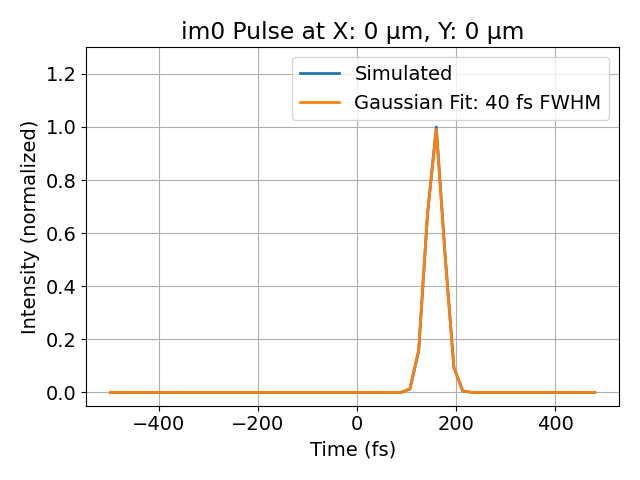

<IPython.core.display.Javascript object>


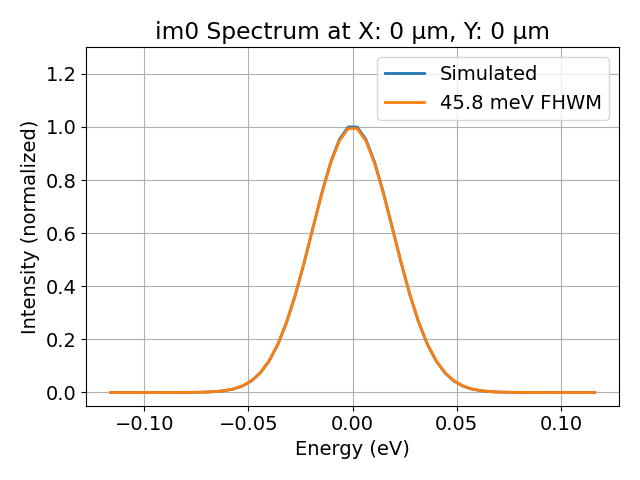

<IPython.core.display.Javascript object>


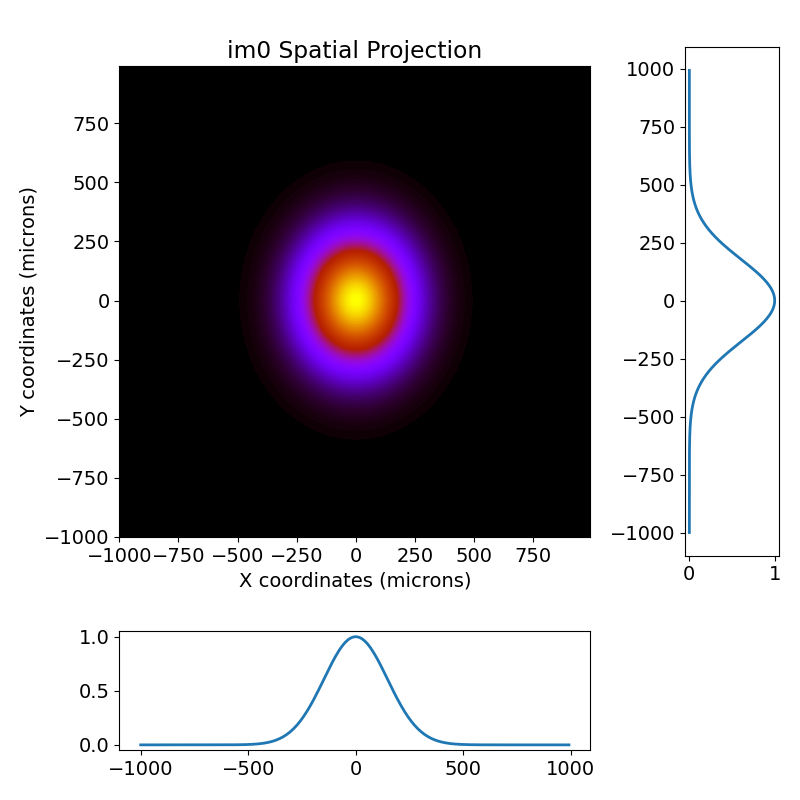

(<matplotlib.axes._subplots.AxesSubplot at 0x120bd97b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x120c10dd8>)

In [38]:
fig_path = '/Users/Matt/OneDrive - SLAC National Accelerator Laboratory/Projects/Tunable Mono/figures/'

# plot input pulse at beam center
pulse.plot_pulse('im0')
# plt.savefig(fig_path+'input_pulse_no_slit.png')
# plot input spectrum at beam center
pulse.plot_spectrum('im0')
# plt.savefig(fig_path+'input_spectrum_no_slit.png')
# plot input beam spatial projection
pulse.imshow_projection('im0')
# plt.savefig(fig_path+'input_spatial_no_slit.png')

### Visualize focus properties

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1189: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,6))


<IPython.core.display.Javascript object>


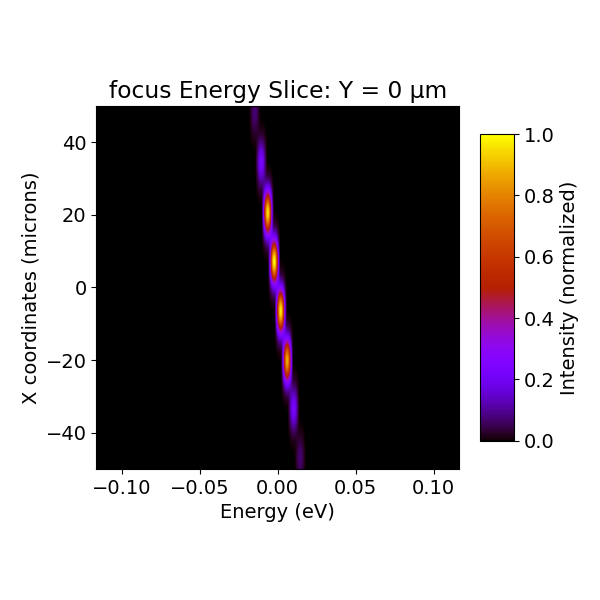

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1281: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6, 6))


<IPython.core.display.Javascript object>


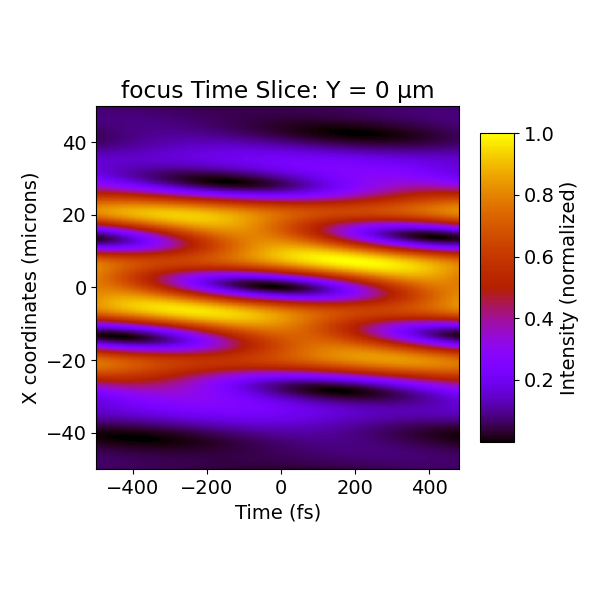

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


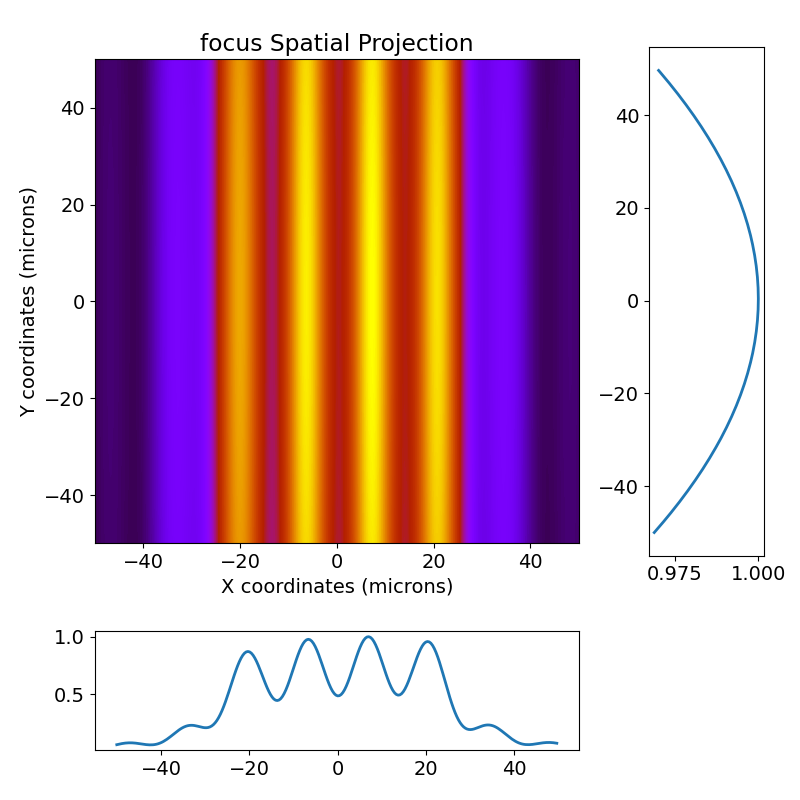

(<matplotlib.axes._subplots.AxesSubplot at 0x120e58c50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x120e89f98>)

In [39]:
# plot energy slice of focus
pulse.imshow_energy_slice('focus')
# plt.savefig(fig_path+'option1_focus_energy_no_slit.png')
# plot time slice of focus
pulse.imshow_time_slice('focus', shift=-1000)
# plt.savefig(fig_path+'option1_focus_time_no_slit.png')
# show spatial projection
pulse.imshow_projection('focus')
# plt.savefig(fig_path+'option1_focus_spatial_no_slit.png')

### Visualize output

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1826: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


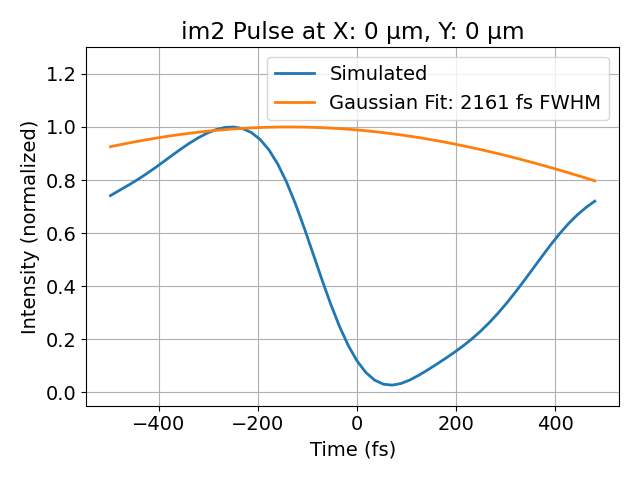

/Users/seaberg/beamline/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1454: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


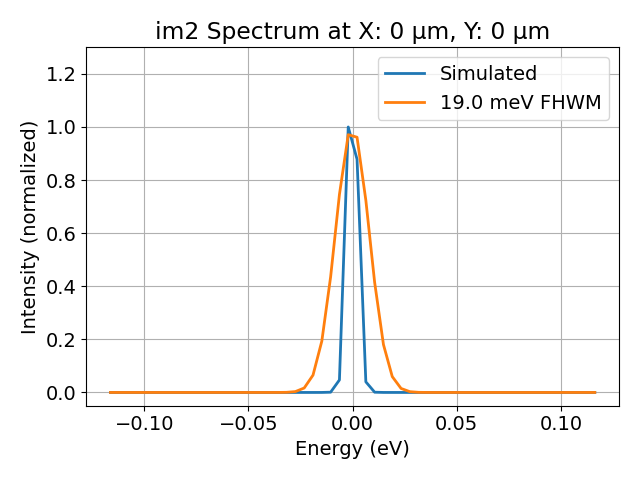

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


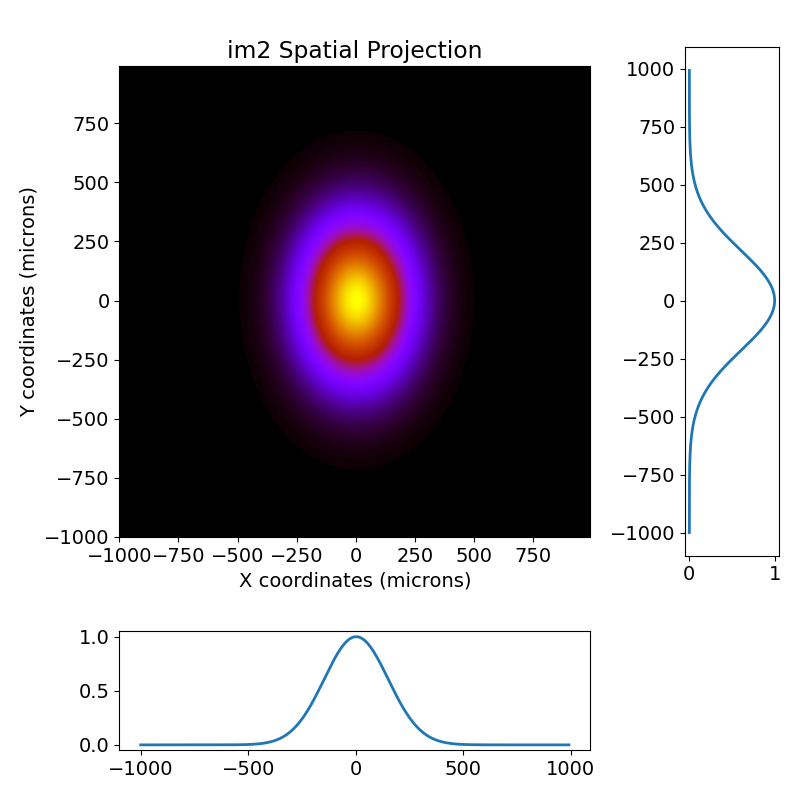

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1281: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6, 6))


<IPython.core.display.Javascript object>


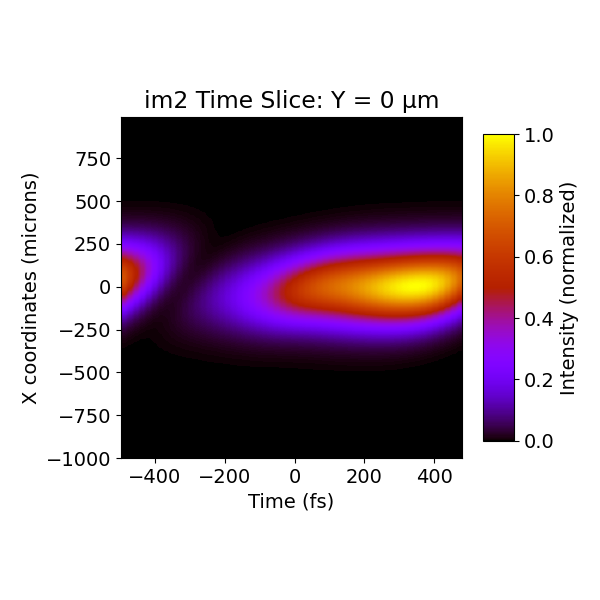

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1189: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,6))


<IPython.core.display.Javascript object>


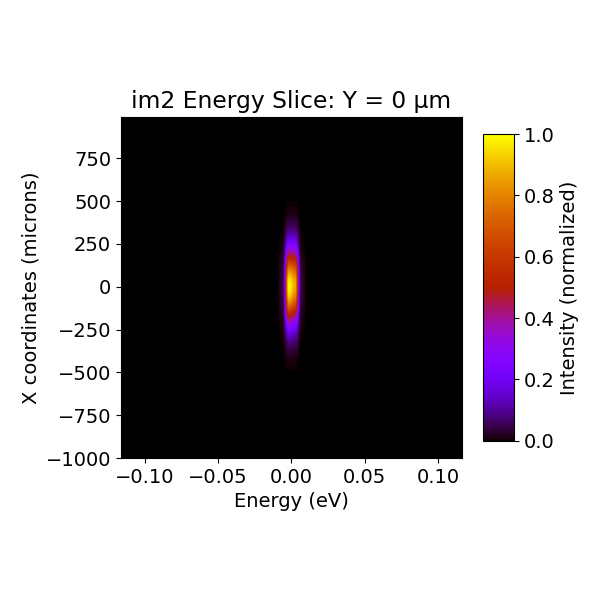

<IPython.core.display.Javascript object>


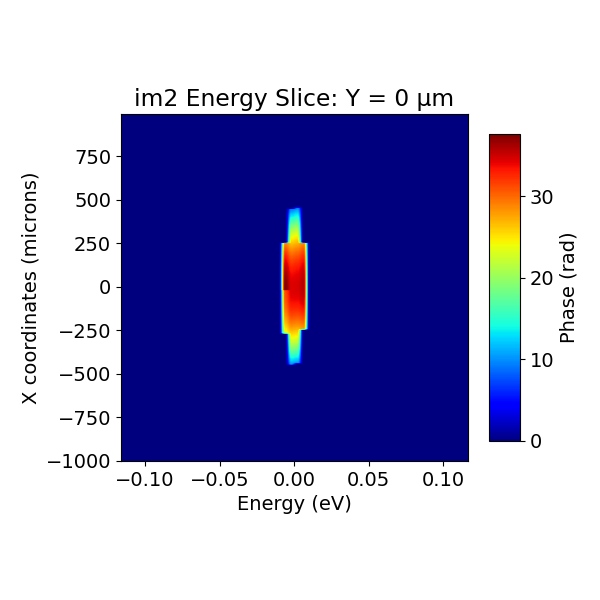

(-101.71697185507055, 537)
[2.88       2.88014286 2.88028571 2.88042857 2.88057143 2.88071429
 2.88085714 2.881      2.88114286 2.88128571 2.88142857 2.88157143
 2.88171429 2.88185714 2.882      2.88214286 2.88228571 2.88242857
 2.88257143 2.88271429 2.88285714 2.883      2.88314286 2.88328571
 2.88342857 2.88357143 2.88371429 2.88385714 2.884      2.88414286
 2.88428571 2.88442857 2.88457143 2.88471429 2.88485714 2.885
 2.88514286 2.88528571 2.88542857 2.88557143 2.88571429 2.88585714
 2.886      2.88614286 2.88628571 2.88642857 2.88657143 2.88671429
 2.88685714 2.887     ]


In [40]:
# plot output pulse at beam center
pulse.plot_pulse('im2', shift=600)
# plt.savefig(fig_path+'option1_output_pulse_no_slit.png')
# plot output spectraum at beam center
pulse.plot_spectrum('im2')
# plt.savefig(fig_path+'option1_output_spectrum_no_slit.png')
# show spatial projection of output
pulse.imshow_projection('im2')
# plt.savefig(fig_path+'option1_output_spatial_no_slit.png')
# show time slice of output
pulse.imshow_time_slice('im2', shift=200)
# plt.savefig(fig_path+'option1_output_time_no_slit.png')
# show energy slice of output
pulse.imshow_energy_slice('im2')
# plt.savefig(fig_path+'option1_output_energy_no_slit.png')
# show spectral phase slice of output
pulse.imshow_energy_slice('im2', image_type='phase')
print(pulse.pulse_duration('im2'))
f1 = np.linspace(2.88, 2.887, 50)
print(f1)

In [9]:
def define_devices(f1, f2):
    # crystal asymmetry angle
    alphaAsym = 19.88*np.pi/180

    # distance between crystal 2 and 1st CRL, 2nd CRL and crystal 4 
#     f1 = 2.884
    # distance between CRLs and focus
#     f2 = 3

    # crystal reflection hkl index
    hkl = [3,1,1]

    # initialize the beam
    b1 = beam.Beam(beam_params=beam_params)

    # viewing point upstream of monochromator
    im0 = optics.PPM('im0', z=870, FOV=2e-3, N=256)
    crl0 = optics.CRL('crl0', z=830, roc=1700e-6, diameter=2e-3)

    # first crystal: symmetric reflection
    crystal1 = optics.Crystal('c1', hkl=hkl, length=10e-2, width=20e-3, z=880, E0=E0,
                              alphaAsym=0, orientation=0, pol='s')

    # second crystal: asymmetric reflection, orientation flipped relative to crystal1
    crystal2 = optics.Crystal('c2', hkl=hkl, length=10e-2, width=20e-3, z=crystal1.z+.2, E0=E0,alphaAsym=alphaAsym, 
                              orientation=2,pol='s')
    # printing crystal incidence and reflection angles for confirmation
    print('crystal 2 incidence angle: {:.2f} degrees'.format(crystal2.alpha*180/np.pi))
    print('crystal 2 exit angle: {:.2f} degrees'.format(crystal2.beta0*180/np.pi))

    im_upstream = optics.PPM('im_upstream', z=crystal2.z + f1 - .1, FOV=2e-3, N=256)

    # CRL with ~1 meter focal length (modeled as single element for now)
    crl1 = optics.CRL('crl1', z=crystal2.z+f1, roc=25.25e-6, diameter=5e-3)

    # viewing point downstream of first crl
    im1 = optics.PPM('im1', z=crl1.z+.1,N=256,FOV=2e-3)

    # viewing point at focus
    focus = optics.PPM('focus', z=crl1.z+f2+.03, FOV=100e-6, N=256)

    # slit at focus
    slit = optics.Slit('slit', z=crl1.z+f2 + 1e-3+.03, x_width=4e-6, y_width=2e-3)

    # second CRL with ~1 meter focal length, for collimation
    crl2 = optics.CRL('crl2', z=crl1.z+2*f2, roc=25.25e-6, diameter=5e-3)

    # third crystal, symmetric reflection, same orientation as crystal2
    crystal3 = optics.Crystal('c3', hkl=hkl, length=10e-2, width=10e-3, z=crl2.z+2, E0=E0,alphaAsym=0, orientation=2,
                             asym_type='emergence',pol='s')

    # fourth crystal, asymmetric reflection, same orientation as crystal1
    crystal4 = optics.Crystal('c4', hkl=hkl, length=10e-2, width=10e-3, z=crl2.z+2 + (f1-2)*np.cos(crystal1.beta0*2), E0=E0,alphaAsym=-alphaAsym, 
                              asym_type='emergence', orientation=0,pol='s')

    # viewing point just downstream of monochromator
    im2 = optics.PPM('im2', z=crystal4.z+.1, FOV=2e-3, N=256)

    # list of devices to propagate through
    devices = [crl0,im0,crystal1,crystal2,im_upstream, im1, crl1, focus, crl2, crystal3, crystal4, im2]
    
    return devices

In [2]:
lambda0 = 1239.8/9000*1e-9
phase = 80
path = phase*lambda0/2/np.pi

In [3]:
print(path)

1.7539582084029499e-09


In [8]:
1/(1/6+1/3)

2.0

In [34]:
37/20

1.85

In [11]:
400/8

50.0

In [32]:
9*2/20

0.9

In [45]:
np.pi*(10e-6)**2/b1.lambda0

4.509166097001966